In [1]:
import pandas as pd;
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [2]:
EXP_A = ["regras por objetivo = 3.csv" , "regras por objetivo = 4.csv" , "regras por objetivo = 5.csv"]
EXP_B = [ "objetivos = 100 crenças = 500.csv" , "objetivos = 100 crenças = 1000.csv", "objetivos = 50 crenças = 1000.csv"]
EXP_C = [ "fator de dinâmica = 0.csv", "fator de dinâmica = 0.1.csv" , "fator de dinâmica = 0.2.csv"]

persistencia = [ "Persistente" , "Reminiscente"  , "Obliterante"];
PERSISTENTE = 0 ; REMINISCENTE = 1 ; OBLITERANTE = 2;

raciocinio = ["SOAR" , "BDI" , "BBGP"];
SOAR = 0 ; BDI = 1 ; BBGP = 2;

relevancia = ["Customizado" , "Linha base"]
CUSTOMIZADO = 0 ; LINHA_BASE = 1;

metrica = ["cpu" , "memoria"];
metricaNormalizada = ["cpuNormal" , "memoriaNormal"];
CPU = 0 ; MEM = 1

In [3]:
def normalizar(data):
    df_min_max_scaled = data.copy()
    column = 'cpu';
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 
    data['cpuNormal'] =  df_min_max_scaled[column];
    column = 'memoria';
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 
    data['memoriaNormal'] =  df_min_max_scaled[column];
    return data;  

In [62]:
def ordenarDataFrame(DADOS):
    multi_tuples = [( ' Persistente ', 'Linha base '),( ' Persistente ',  'Customizado '),(' Reminiscente ', 'Linha base '),(' Reminiscente ',  'Customizado '),( ' Obliterante ', 'Linha base '),( ' Obliterante ',  'Customizado ')]
    multi_cols = pd.MultiIndex.from_tuples(multi_tuples, names=['Persistência','Relevância'])
    return pd.DataFrame(DADOS, columns=multi_cols)

In [63]:
def obterDadosNormalizados(PLANILHA , RACIOCINIO , METRICA):
    dados = pd.read_csv(PLANILHA , sep =";", decimal =",")
    dados = normalizar(dados);
    dados = dados.loc[(dados['raciocinio'].str.contains(raciocinio[RACIOCINIO]))]
    dados = dados.groupby(['persistencia' , 'relevancia'])[metricaNormalizada[METRICA]]
    dados = dados.describe()[['mean' , 'std' , 'min' , '25%', '50%', '75%','max']];
    transposta = dados.T
    ordenada = ordenarDataFrame(transposta)
    return pd.DataFrame(ordenada)   

In [111]:
def exportarTabelaLatex(dados):
    dados = dados.T.to_latex()
    dados = dados.replace("mean" , "\mu")
    dados = dados.replace("std" , "\sigma")
    dados = dados.replace("begin{tabular}{llrrrrrrr}" ,"begin{table}[htb] \n \\begin{tabular}{llrrrrrrr}s" )
    dados = dados.replace("\\end{tabular}" , "\\end{tabular} \\caption{\label{tab:tabela} Legenda } \\fonte{Autoria própria.}%% Fonte \n \\end{table}") 
    print(dados)

In [112]:
def exportarTabelasPorRaciocinio(EXPERIMENTO , RACIOCINIO , PROPRIEDADE):
    dados = obterDadosNormalizados(EXP_A[0] , RACIOCINIO , PROPRIEDADE);
    exportarTabelaLatex(dados);
    dados = obterDadosNormalizados(EXP_A[1] , RACIOCINIO , PROPRIEDADE);
    exportarTabelaLatex(dados);
    dados = obterDadosNormalizados(EXP_A[2] , RACIOCINIO , PROPRIEDADE);
    exportarTabelaLatex(dados);
      
exportarTabelasPorRaciocinio(EXP_A , SOAR , CPU)

\begin{table}[htb] 
 \begin{tabular}{llrrrrrrr}s
\toprule
              &              &      \mu &       \sigma &       min &       25\% &       50\% &       75\% &       max \\
Persistência & Relevância &           &           &           &           &           &           &           \\
\midrule
 Persistente  & Linha base  &  0.037886 &  0.003168 &  0.031520 &  0.035942 &  0.037733 &  0.039836 &  0.045845 \\
              & Customizado  &  0.037886 &  0.003168 &  0.031520 &  0.035942 &  0.037733 &  0.039836 &  0.045845 \\
 Reminiscente  & Linha base  &  0.254699 &  0.056317 &  0.144860 &  0.214464 &  0.251921 &  0.287513 &  0.404236 \\
              & Customizado  &  0.254910 &  0.059645 &  0.088097 &  0.211247 &  0.250611 &  0.293677 &  0.413680 \\
 Obliterante  & Linha base  &  0.312836 &  0.164509 &  0.001206 &  0.205512 &  0.305730 &  0.438265 &  0.719765 \\
              & Customizado  &  0.323534 &  0.187710 &  0.001942 &  0.191157 &  0.298532 &  0.461773 &  1.000000 \\
\bott

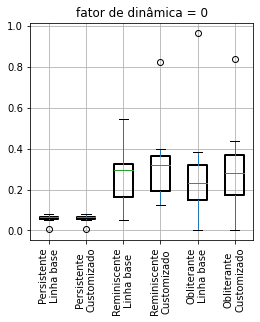

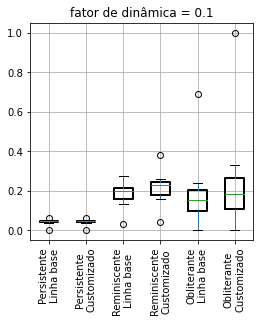

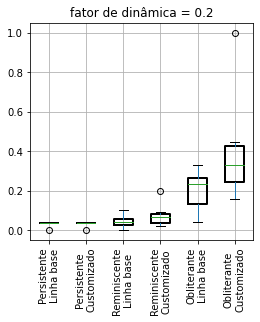

In [40]:
props = dict(linewidth=2)

lab = ['Persistente\nLinha base' , 'Persistente\nCustomizado', 'Reminiscente\nLinha base' , 'Reminiscente\nCustomizado' , 'Obliterante\nLinha base' , 'Obliterante\nCustomizado']

def plotarGrafico(EXPERIMENTO, RACIOCINIO , METRICA):
    figures = []
    for x in EXPERIMENTO:
        dados = obterDadosNormalizados(x , RACIOCINIO , METRICA)
        dados.plot.box(by='persistencia', title=x.replace(".csv","") , boxprops=props, grid=True , figsize=(4,4))
        plt.xticks(ticks = [1,2,3,4,5,6] ,labels = lab, rotation="vertical") 
        
plotarGrafico(EXP_C , BBGP , CPU)

In [92]:
def obterDadosAgrupados(PLANILHA , RACIOCINIO , METRICA):
    dados = pd.read_csv(PLANILHA , sep =";", decimal =",")
    dados = dados.loc[(dados['raciocinio'].str.contains(raciocinio[RACIOCINIO]))] 
    comparacoes = dados.groupby(['persistencia' , 'relevancia'])['comparacoes']
    comparacoesStat = comparacoes.describe()[['mean' , 'std']];
    crencas = dados.groupby(['persistencia' , 'relevancia'])['crencasAtivas']
    crencasStat = crencas.describe()[['mean' , 'std']];
    df = pd.merge(comparacoesStat,crencasStat, on=["persistencia","relevancia"])
    df.rename(columns={'mean_x': 'mean-Comparações'}, inplace=True)
    df.rename(columns={'std_x': 'std-Comparações'}, inplace=True)
    df.rename(columns={'mean_y': 'mean-Crenças ativas'}, inplace=True)
    df.rename(columns={'std_y': 'std-Crencas ativas'}, inplace=True)
    movimentacoes = dados.groupby(['persistencia' , 'relevancia'])['movimentacoes']
    movimentacoesStat = movimentacoes.describe()[['mean' , 'std']];
    df = pd.merge(df,movimentacoesStat, on=["persistencia","relevancia"])
    df.rename(columns={'mean': 'mean-Movimentações'}, inplace=True)
    df.rename(columns={'std': 'std-Movimentações'}, inplace=True)
    utilidade = dados.groupby(['persistencia' , 'relevancia'])['utilidade']
    utilidadeStat = utilidade.describe()[['mean' , 'std']];
    df = pd.merge(df,utilidadeStat, on=["persistencia","relevancia"])
    df.rename(columns={'mean': 'mean-Utilidade'}, inplace=True)
    df.rename(columns={'std': 'std-Utilidade'}, inplace=True)
    transposta = df.T
    ordenada = ordenarDataFrame(transposta)
    return ordenada
    
    
    
obterDadosAgrupados(EXP_A[0] , BBGP , CPU)

Persistência         Persistente                 Reminiscente                 \
Relevância            Linha base   Customizado     Linha base   Customizado    
mean-Comparações     75738.087570  75738.087570   32948.261280  25899.974620   
std-Comparações       5647.026272   5647.026272    6963.754170   7794.855243   
mean-Crenças ativas    184.354098    184.354098      21.864957     12.340415   
std-Crencas ativas       5.481007      5.481007       4.907630      2.785212   
mean-Movimentações       0.000000      0.000000     420.184601    731.329855   
std-Movimentações        0.000000      0.000000      37.579746    135.524475   
mean-Utilidade          30.569281     30.569281      23.568600     17.779110   
std-Utilidade            2.570025      2.570025       4.589358      4.228248   

Persistência         Obliterante                
Relevância            Linha base  Customizado   
mean-Comparações      2305.149400  2329.759917  
std-Comparações        155.941204   159.899469  
mean-Crenças ativas      1.286257     1.312215  
std-Crencas ativas       0.025973     0.036193  
mean-Movimentações     478.232028   475.637309  
std-Movimentações       18.868995    18.435388  
mean-Utilidade           1.799500     2.010644  
std-Utilidade            0.984864     1.157825

In [106]:
def exportarTabelasDadosBrutosPorRaciocinio(EXPERIMENTO , RACIOCINIO , PROPRIEDADE):
    dados = obterDadosAgrupados(EXP_A[0] , RACIOCINIO , PROPRIEDADE);
    exportarTabelaLatex(dados);
    dados = obterDadosAgrupados(EXP_A[1] , RACIOCINIO , PROPRIEDADE);
    exportarTabelaLatex(dados);
    dados = obterDadosAgrupados(EXP_A[2] , RACIOCINIO , PROPRIEDADE);
    exportarTabelaLatex(dados);
    
exportarTabelasDadosBrutosPorRaciocinio(EXP_A , BBGP , CPU)

\begin{table}[htb] 
 \begin{tabular}{llrrrrrrr}s
\toprule
Persistência & \multicolumn{2}{l}{Persistente} & \multicolumn{2}{l}{Reminiscente} & \multicolumn{2}{l}{Obliterante} \\
Relevância &   Linha base  &  Customizado  &    Linha base  &  Customizado  &   Linha base  & Customizado  \\
\midrule
\mu-Comparações    &  75738.087570 &  75738.087570 &   32948.261280 &  25899.974620 &   2305.149400 &  2329.759917 \\
\sigma-Comparações     &   5647.026272 &   5647.026272 &    6963.754170 &   7794.855243 &    155.941204 &   159.899469 \\
\mu-Crenças ativas &    184.354098 &    184.354098 &      21.864957 &     12.340415 &      1.286257 &     1.312215 \\
\sigma-Crencas ativas  &      5.481007 &      5.481007 &       4.907630 &      2.785212 &      0.025973 &     0.036193 \\
\mu-Movimentações  &      0.000000 &      0.000000 &     420.184601 &    731.329855 &    478.232028 &   475.637309 \\
\sigma-Movimentações   &      0.000000 &      0.000000 &      37.579746 &    135.524475 &     18.868995 & 

In [89]:
from scipy.stats import kruskal

def kruskalTestCpu(memoryStrategyIndex, engineIndex, data):
    dist1 = select(memoryStrategyIndex , engineIndex, 0 , data)[efficiencyProperties[CPU]]
    dist2 = select(memoryStrategyIndex , engineIndex, engineIndex+1 , data)[efficiencyProperties[CPU]]
    stat , p = kruskal(dist1 , dist2)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        return False;
    else:
        return True

In [30]:
data = readFromCsvScaled(DYNAMICS_SCENARIO[1]);

kruskalTestCpu(FORGETTING, SOAR, data);


stat=0.095, p=0.759
